In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
MODEL = "multiz100way/89/128/64/True/defined.phastCons.percentile-75_0.05_0.001/medium/0.1/42/30000/True/True/True"
d = Path("../../results/embedding")
windows = pd.read_parquet(d / "windows.parquet")
windows["pred_Region"] = pd.read_parquet(
    d / "classification" / f"{MODEL}.parquet"
).pred_Region.values
region_renaming = {
    "intergenic": "Intergenic",
    "intron": "Intron",
    "ncRNA_gene": "ncRNA",
    "five_prime_UTR": "5' UTR",
    "three_prime_UTR": "3' UTR",
}
windows.Region = windows.Region.replace(region_renaming)
windows.pred_Region = windows.pred_Region.replace(region_renaming)
windows

,chrom,start,end,strand,center_start,center_end,Region,pred_Region
0,8,22104645,22104773,+,22104659,22104759,three_prime_utr,three_prime_utr
1,6,43017800,43017928,+,43017814,43017914,Intron,Intron
2,10,132228030,132228158,+,132228044,132228144,CDS,CDS
3,2,233802186,233802314,+,233802200,233802300,CDS,CDS
4,11,108158364,108158492,+,108158378,108158478,three_prime_utr,three_prime_utr
...,...,...,...,...,...,...,...,...
107599,3,20038083,20038211,+,20038097,20038197,Intergenic,Intergenic
107600,5,75583607,75583735,+,75583621,75583721,Intron,three_prime_utr
107601,14,70032013,70032141,+,70032027,70032127,three_prime_utr,three_prime_utr
107602,20,63312819,63312947,+,63312833,63312933,CDS,CDS


In [8]:
regions = windows.Region.unique()

In [4]:
windows.Region.value_counts()

Region
three_prime_utr    17934
Intron             17934
CDS                17934
Repeat             17934
five_prime_utr     17934
Intergenic         17934
Name: count, dtype: int64

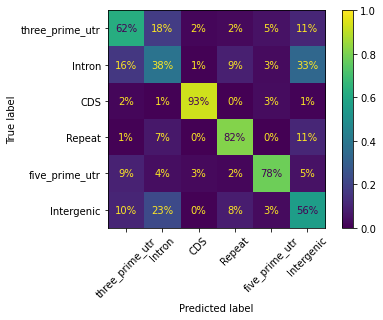

In [10]:
ConfusionMatrixDisplay.from_predictions(
    windows.Region,
    windows.pred_Region,
    normalize="true",
    labels=regions,
    values_format=".0%",
    im_kw=dict(vmin=0, vmax=1),
)
plt.xticks(rotation=45);
# plt.savefig(f"results/plots/classification_{MODEL.replace('/', '_')}.svg", bbox_inches="tight")